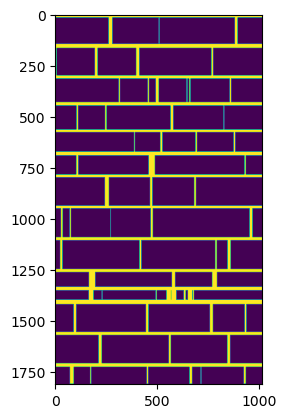

In [1]:
#isolate each block
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#pic = Image.open("../data/loggingtest1/testsynth.tiff")
pic = Image.open("../data/bothwallsynth/test0.6/results/picoutdepthUnetresnet34wall1fit.tiff")#/croppedimages/2.tiff")
picnp = np.array(pic)
plt.imshow(picnp)

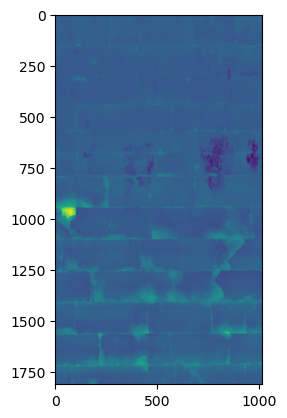

In [8]:
picoriginal = Image.open("../data/bothwallsynth/test0.6/test.tiff")#/croppedimages/2.tiff")
picorignp = np.array(picoriginal)
plt.imshow(picorignp)

In [9]:
picorignp[200,200]

416537.0

In [10]:
picorignp.min()

0.0

In [11]:
import cv2 as cv
labels, markedim = cv.connectedComponents(255-picnp)

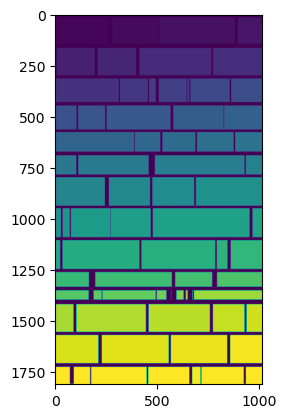

In [12]:
plt.imshow(markedim)

In [44]:
#for blockno = range(1, labels+1)
blockno = 25
blockextract = (markedim == blockno).astype(np.uint8)
#plt.imshow(blockextract, cmap='gray')
block = blockextract*picorignp


In [45]:
block.shape

(1811, 1013)

In [46]:
labelst = np.nonzero(block)

In [47]:
len(labelst[0])

17005

In [48]:
labelst[0].min()

578

In [49]:
blockcrop = block[labelst[0].min():labelst[0].max(),labelst[1].min():labelst[1].max()]

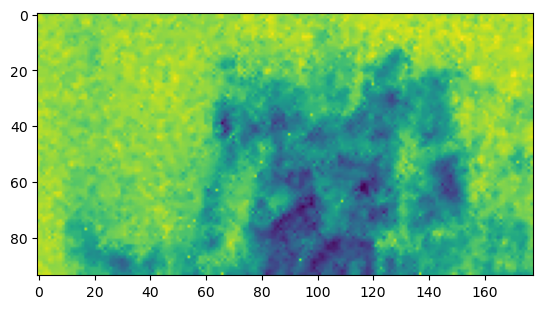

In [50]:
plt.imshow(blockcrop)

In [51]:
blockcrop

array([[414557.  , 403832.66, 382384.  , ..., 405056.  , 407082.5 ,
        417103.66],
       [416649.  , 416649.  , 399516.5 , ..., 415013.5 , 413045.34,
        409109.  ],
       [411107.5 , 411107.5 , 406232.66, ..., 397580.  , 432447.  ,
        420769.25],
       ...,
       [414153.  , 412482.  , 409140.  , ..., 360952.  , 343649.75,
        347058.  ],
       [402888.  , 402888.  , 410105.66, ..., 319531.  , 331896.  ,
        341931.  ],
       [424572.5 , 410588.5 , 418289.  , ..., 301353.34, 305170.  ,
        329215.  ]], dtype=float32)

In [52]:
blockcrope = blockcrop>blockcrop.mean()

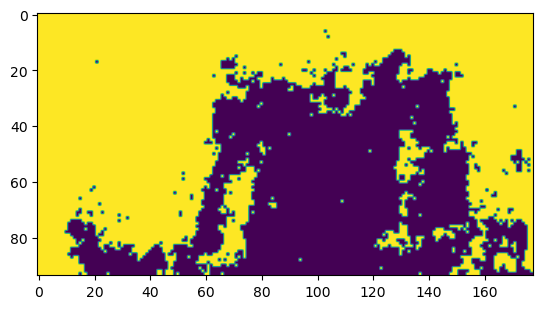

In [53]:
plt.imshow(blockcrope)

In [54]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = blockcrop.flatten()#np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(0,blockcrop.shape[1],1), np.arange(0,blockcrop.shape[0],1))
XX = X.flatten()
YY = Y.flatten()

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[XX, YY, np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data)    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)


# # plot points and fitted surface
# fig = plt.figure()
# ax =  Axes3D(fig)
# #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
# ax.scatter(X, Y, data, c='r', s=50)
# plt.xlabel('X')
# plt.ylabel('Y')
# ax.set_zlabel('Z')
# ax.axis('equal')
# ax.axis('tight')

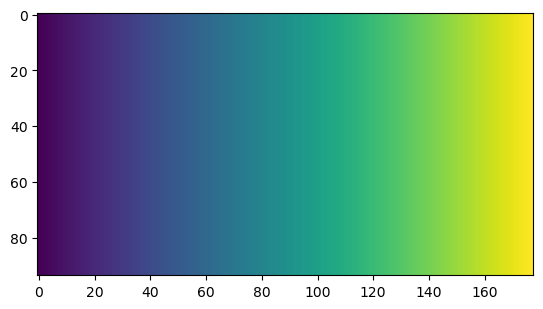

In [55]:
plt.imshow(X)

In [56]:
data.shape

(16732,)

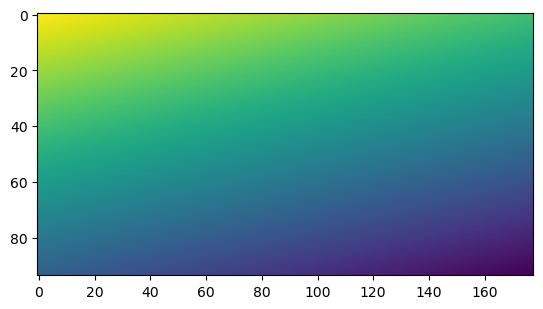

In [57]:
plt.imshow(Z)

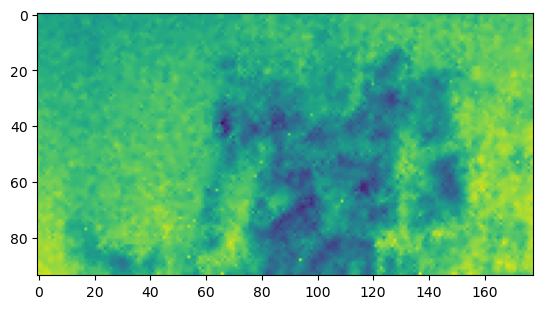

In [58]:
plt.imshow(blockcrop-Z)

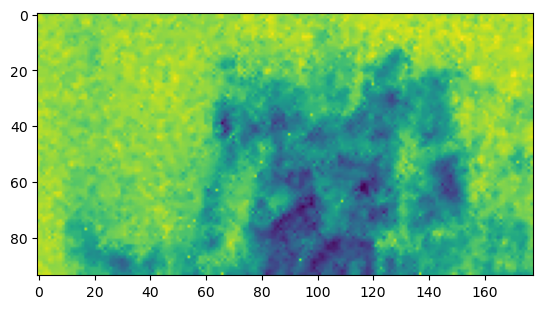

In [59]:
plt.imshow(blockcrop)

In [60]:
blockoffset = blockcrop-Z

In [61]:
blockoffset

array([[ -4445.11079459, -14896.83000026, -36072.86170592, ...,
         33763.18446447,  36062.30900881,  46356.08980314],
       [ -1175.461961  ,   -902.83741666, -17762.71287232, ...,
         44898.33329806,  43202.8015924 ,  39539.08238674],
       [ -5539.3131274 ,  -5266.68858307,  -9868.90778873, ...,
         28642.48213166,  63782.106676  ,  52376.98122033],
       ...,
       [102316.93306255, 100918.55760689,  97849.18215123, ...,
         96825.22832161,  79795.60286595,  83476.47741029],
       [ 92229.58189615,  92502.20644048,  99992.48723482, ...,
         56581.87715521,  69219.50169955,  79527.12624388],
       [115091.73072974, 101380.35527408, 109353.47981842, ...,
         39581.8697388 ,  43671.15053314,  67988.77507748]])

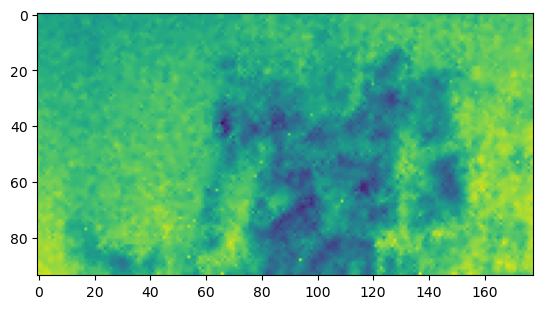

In [62]:
plt.imshow(blockoffset)

In [31]:
blockoffset.mean()

-1.447784387395033e-09

In [32]:
blockoffset.max()

100865.32171100227

In [33]:
blockoffset.min()

-92302.56425525463

In [34]:
blockcrop.min()

292696.0

In [ ]:
blockcrop.max()

In [ ]:
Z.min()

In [ ]:
Z.max()

In [ ]:
blockoffset = blockoffset-blockoffset.min()

In [ ]:
blockoffsethist = (255*blockoffset/blockoffset.max())

In [ ]:
blockoffsethist = blockoffsethist.astype('uint8')

In [ ]:

  
# importing library for plotting
from matplotlib import pyplot as plt
  

  
# find frequency of pixels in range 0-255
histr = cv.calcHist([blockoffsethist], [0], None, [256], (0,255))
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [ ]:
blockoffsethist.min()

In [ ]:
blockoffset.min()

In [ ]:
blockoffsethist = (255*blockoffset/blockoffset.max())

In [ ]:
blockoffsethist.min()

In [ ]:
blockoffsethist = blockoffsethist.astype('uint8')

In [ ]:
blockoffsethist.min()

In [1]:
from raster import raster
from postprocess1 import postprocess
from RUN import UNETrun
import os
try:
    os.makedirs("../data/imtest/")
    
except OSError:
    pass 

os.chdir("../data/imtest/")



[0]
X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time
red
green
blue
number of points = 1112805
6.5360000000000005 6.791 1.0390146878824968
number of pixels = 1113660
width in pixels = 1076
height in pixels = 1035
mean pixel value = 0.16580482351619308


0

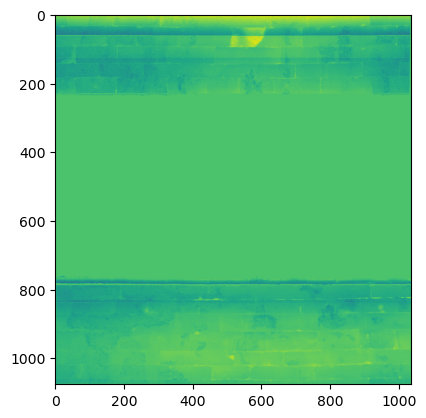

In [2]:
cloud = "testflatten.las"
saveloc = ""
raster(cloud,saveloc,mask = 0,res=1,dim=None)

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open("raster.tiff")
imnporig = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
#plt.imshow(imnp[100:700,100:1200])

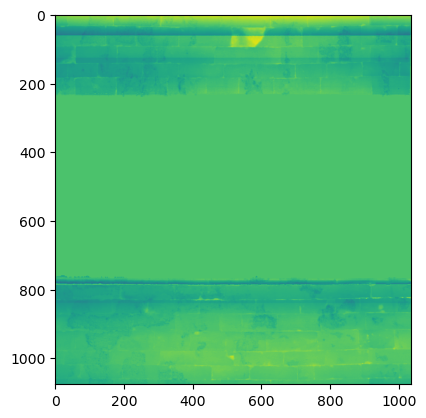

In [3]:
plt.imshow(imnporig)

In [9]:
inno = 1
savestate = "Final_epoch_299UnetPlusPlusresnet34.pt"
type1 = "depth"
network = 'UnetPlusPlus'
path = "../imtest"
encoder = 'resnet34'
dim = 256
savetag = "1"

iou_score,iou_scorefit, precision,recall = UNETrun(inno, savestate, type1, network, path, encoder, dim, "/raster.tiff","/raster.tiff", savetag)



IOU = 0.0
precision = 0.0
recall = nan


c:\Users\jackm\OneDrive - University of Leeds\Pytorch\codebasehome\RUN.py:500: RuntimeWarning: invalid value encountered in long_scalars
  Recall = TP/(TP+FN)


In [10]:
inno = 1
savestate = "spalling.pt"
type1 = "depth"
network = 'UnetPlusPlus'
path = "../imtest"
encoder = 'mobilenet_v2'
dim = 256
savetag = "spalling"

iou_score,iou_scorefit, precision,recall = UNETrun(inno, savestate, type1, network, path, encoder, dim, "/raster.tiff","/raster.tiff", savetag)


IOU = 0.0
precision = 0.0
recall = nan


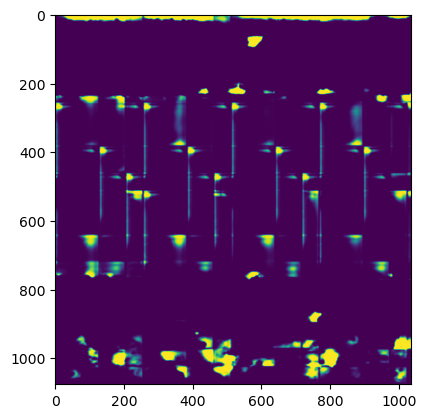

In [5]:
imspall = Image.open("results/picoutdepthUnetPlusPlusmobilenet_v2spalling.tiff")
imnpspall = np.array(imspall)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnpspall)

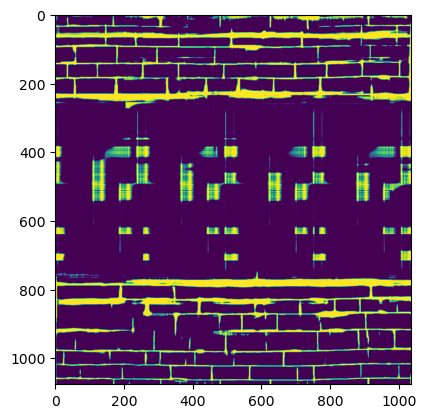

In [12]:
im = Image.open("results/picoutdepthUnetPlusPlusresnet341.tiff")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp)

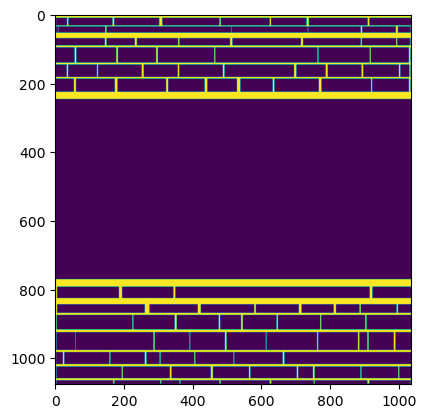

In [5]:
im = Image.open("results/picoutdepthUnetPlusPlusresnet341fit.tiff")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp)

In [6]:
imnp

array([[255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       ...,
       [  0, 255, 255, ...,   0, 255,   0],
       [  0, 255, 255, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

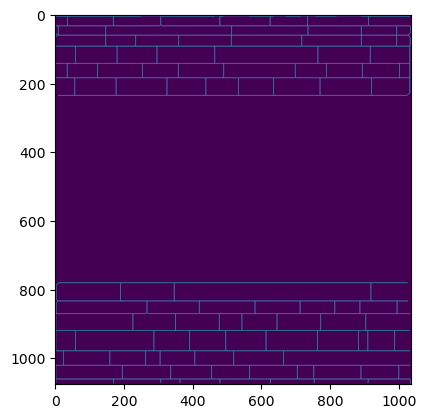

In [12]:
from skimage.morphology import skeletonize
imnp2 = (255*skeletonize(imnp/255)).astype('uint8')
plt.imshow(imnp2)

In [13]:
imnp2

array([[  0, 255,   0, ..., 255, 255, 255],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [14]:
import cv2 as cv
labels, markedim = cv.connectedComponents(255-imnp2)

In [42]:
labels

131

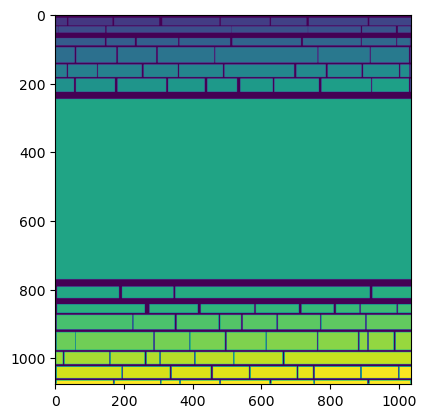

In [43]:
plt.imshow(markedim)

In [44]:
A =(markedim == 5)

In [45]:
A

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

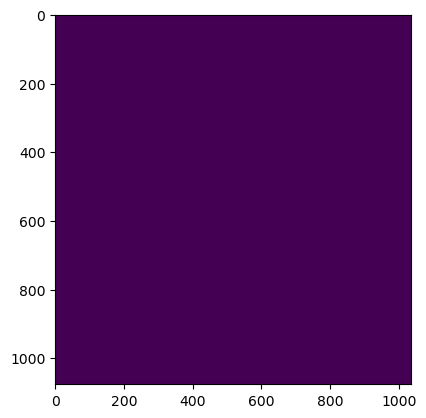

In [34]:
plt.imshow(A)

In [4]:
blocksave = "results/picoutdepthUnetPlusPlusresnet341fit.tiff"
imsave = "raster.tiff"
jointsave = "results/picoutdepthUnetPlusPlusresnet341.tiff"
spallsave = "results/picoutdepthUnetPlusPlusmobilenet_v2spalling.tiff"
from postprocess1 import postprocess
output = postprocess(blocksave,jointsave,spallsave,imsave)

51


In [5]:
#plt.imshow(picnp)

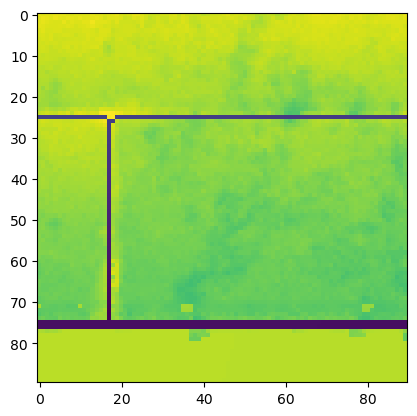

In [6]:
import matplotlib.pyplot as plt
plt.imshow(output[160:250,160:250])

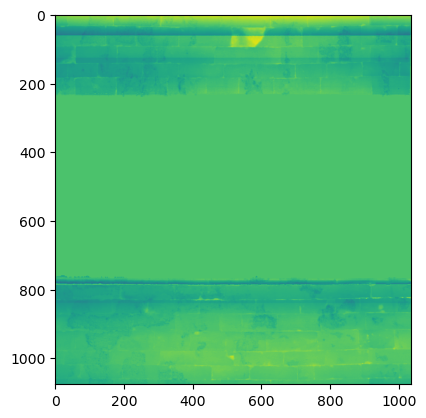

In [7]:
plt.imshow(imnporig)

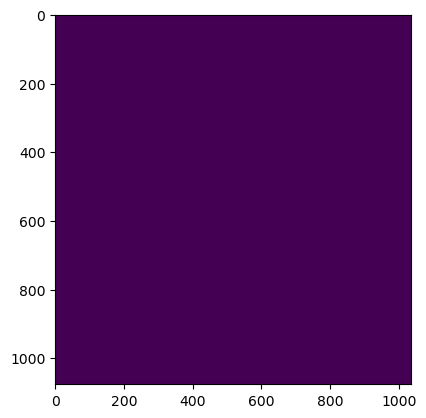

In [8]:
plt.imshow(output>0.1)

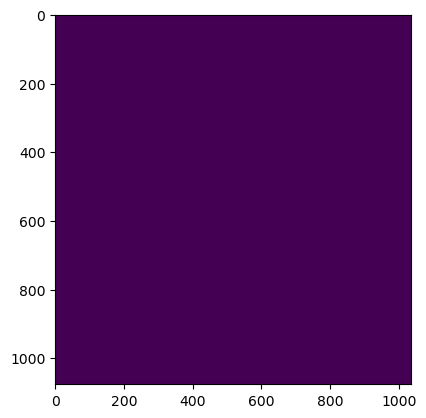

In [9]:
plt.imshow(output>0.04)

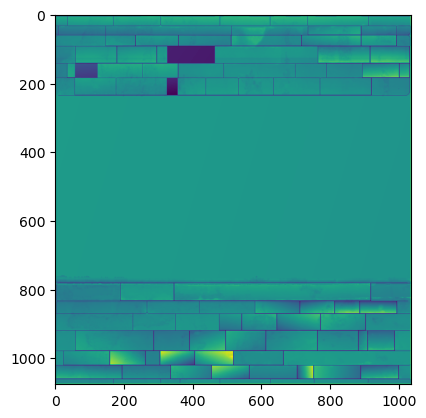

In [10]:
plt.imshow(output)

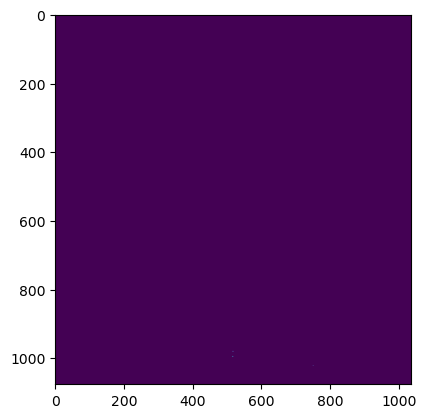

In [11]:
plt.imshow(output>0.01)

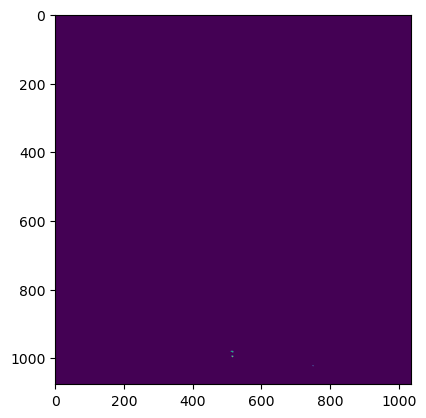

In [12]:
plt.imshow(output>0.005)

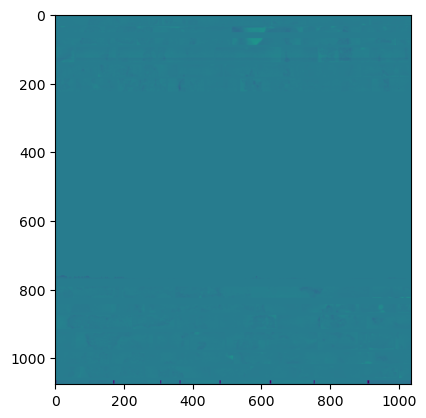

In [10]:
plt.imshow(output)

In [13]:
threshim =imnporig-np.median(imnporig)

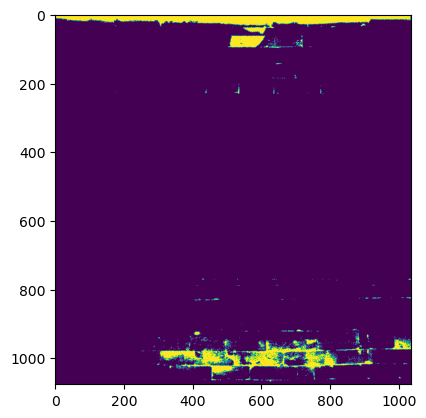

In [15]:
plt.imshow(threshim>0.01)

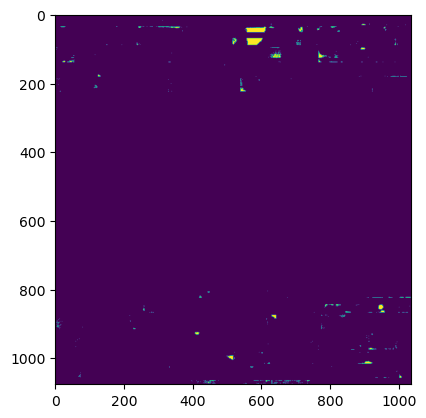

In [16]:
plt.imshow(output>0.01)

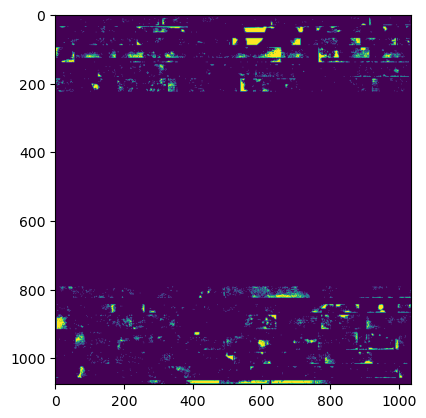

In [17]:
plt.imshow(output>0.005)